# Contoh Prediksi Harga Rumah

## Menggunakan Metode Simple Linier Regression

### Referensi : https://medium.com/@adiptamartulandi/memprediksi-harga-rumah-dengan-machine-learning-multivariate-linear-regression-ucupstory-6f0bac830077

#### Diketahui seorang calon pembeli menginginkan rumah dengan kriteria sebagai berikut:
#### - Jumlah kamar tidur = 3
#### - Jumlah kamar mandi = 1
#### - Luas tanah = 750 sqlt = kaki persegi




In [1]:
# Load library python
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [43]:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html
# Ambil beberapa kolom kecuali electricaly
# Load dataset dengan pandas
df = pd.read_excel('houseJkt_price.xlsx', usecols=['price', 'sqlt_living', 'bedroom', 'bathroom'])

In [44]:
# Melihat 5 baris teratas dari data.
df.head()

,sqlt_living,bedroom,bathroom,price
0,322,3,2,18000
1,742,3,2,10000
2,5489,2,2,15000
3,279,2,1,38000
4,1205,6,2,22000


In [45]:
# Mengetahui jumlah kolom dan baris dari data.
df.shape

(9, 4)

In [47]:
#Melihat informasi data ucup mulai dari jumlah data, tipe data, memory yang digunakan dll.
#Dapat dilihat bahwa seluruh data sudah di dalam bentuk numerik.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   sqlt_living  9 non-null      int64
 1   bedroom      9 non-null      int64
 2   bathroom     9 non-null      int64
 3   price        9 non-null      int64
dtypes: int64(4)
memory usage: 416.0 bytes


In [48]:
#Melihat statistical description dari data mulai dari mean, kuartil, standard deviation dll.
df.describe()

,sqlt_living,bedroom,bathroom,price
count,9.000000,9.000000,9.000000,9.000000
mean,1221.777778,2.666667,1.555556,20333.333333
std,1632.865639,1.414214,0.527046,14551.632211
min,279.000000,1.000000,1.000000,5000.000000
25%,355.000000,2.000000,1.000000,10000.000000
50%,753.000000,2.000000,2.000000,18000.000000
75%,1076.000000,3.000000,2.000000,22000.000000
max,5489.000000,6.000000,2.000000,48000.000000


In [49]:
# #Mencari dan menangani missing values.
#Ternyata datanya sudah tidak ada missing values.
df.isnull().sum()

sqlt_living    0
bedroom        0
bathroom       0
price          0
dtype: int64

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


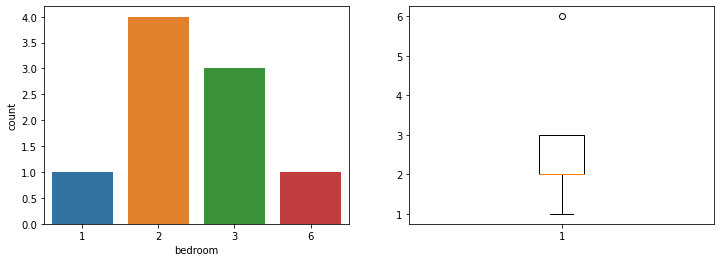

In [50]:
#Univariate analysis bedrooms.
f = plt.figure(figsize=(12,4))
f.add_subplot(1,2,1)
sns.countplot(df['bedroom'])

f.add_subplot(1,2,2)
plt.boxplot(df['bedroom'])
plt.show()

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


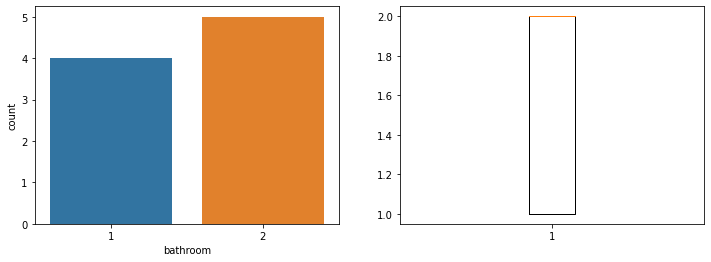

In [51]:
#Univariate analysis bathrooms.

f = plt.figure(figsize=(12,4))
f.add_subplot(1,2,1)
sns.countplot(df['bathroom'])

f.add_subplot(1,2,2)
plt.boxplot(df['bathroom'])
plt.show()

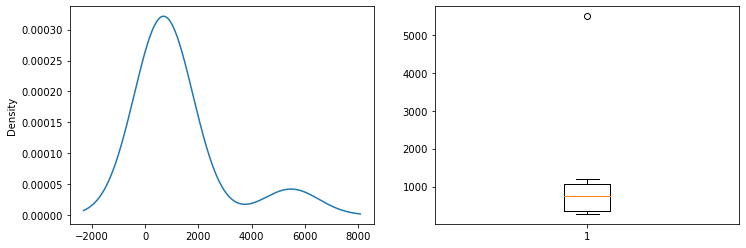

In [52]:
#Univariate analysis sqft_living.

f = plt.figure(figsize=(12,4))
f.add_subplot(1,2,1)
df['sqlt_living'].plot(kind='kde')

f.add_subplot(1,2,2)
plt.boxplot(df['sqlt_living'])
plt.show()

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


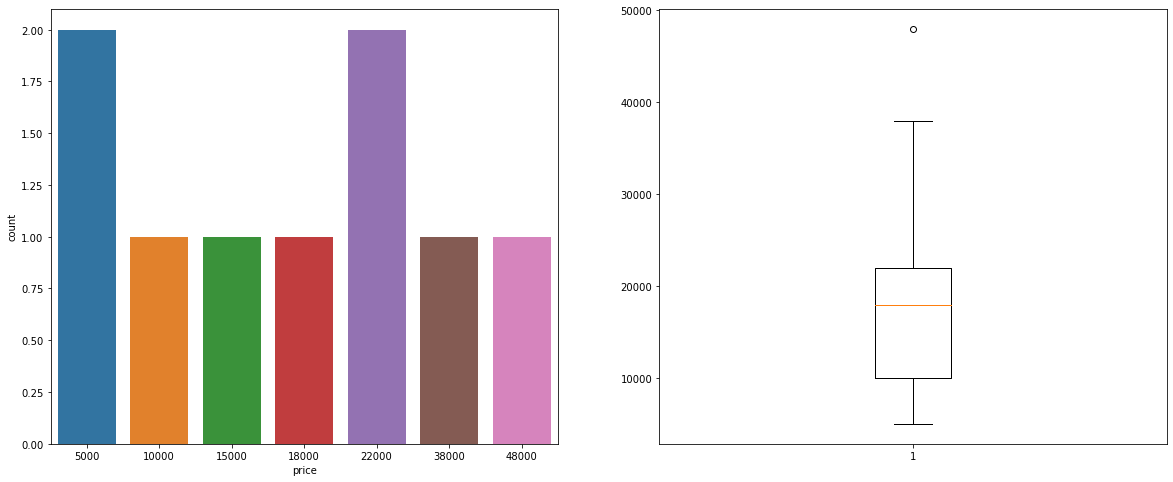

In [53]:
#Univariate analysis price.

f = plt.figure(figsize=(20,8))
f.add_subplot(1,2,1)
sns.countplot(df['price'])

f.add_subplot(1,2,2)
plt.boxplot(df['price'])
plt.show()

<Figure size 720x576 with 0 Axes>

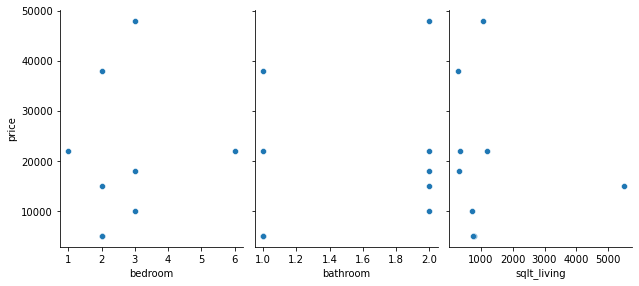

In [54]:
#Bivariate analysis antara independent variable dan dependent variable.

plt.figure(figsize=(10,8))
sns.pairplot(data=df, x_vars=['bedroom', 'bathroom', 'sqlt_living'], y_vars=['price'], height=4, aspect=0.75)

In [55]:
#Mengetahui nilai korelasi dari independent variable dan dependent variable.
df.corr().style.background_gradient().set_precision(2)

,sqlt_living,bedroom,bathroom,price
sqlt_living,1.00,-0.04,0.40,-0.13
bedroom,-0.04,1.00,0.61,0.12
bathroom,0.40,0.61,1.00,0.18
price,-0.13,0.12,0.18,1.00


In [56]:
#Pertama, buat variabel x dan y.
x = df.drop(columns='price')
y = df['price']

In [57]:
#Kedua, split data menjadi training and testing dengan porsi 80:20.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)

In [58]:
#Ketiga, bikin object linear regresi.
lin_reg = LinearRegression()

In [59]:
#Keempat, train the model menggunakan training data yang sudah displit.
lin_reg.fit(x_train, y_train)

LinearRegression()

In [60]:
#Kelima, cari tau nilai slope/koefisien (m) dan intercept (b).
print(lin_reg.coef_)
print(lin_reg.intercept_)

[-4.02802262e+00 -1.19381618e+04  3.01705325e+04]
2921.3259572683855


In [61]:
#Keenam, cari tahu accuracy score dari model menggunakan testing data yang sudah displit.
lin_reg.score(x_test, y_test)


-15.679517574443484

In [68]:
#Prediksi harga rumah idaman Joko.
# Jumlah kamar tidur, mandi, luas tanah
lin_reg.predict([[3,1,550]])

array([16584763.97540404])